# <font color=blue>Depth_maps </font>
The depth maps are used to obtain the 3D surface area of the plant rosette from multiple 2D projections of plants on images. The 3D surface area measurements are less affected by the plant nastic movements than the 2D projected area

### Importing modules
The Python and custom modules are loaded using the import command

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import plotting
import os
import sys
import pandas as pd

### Variable declaration
__expID__ is the experiment ID. __daySowing__ is the day when the seeds were sown into the soil. __dayStart__ is the first day of the image acquisition from the sowing day. __dayStop__ is the last day of the image acquisition from the sowing day. __krnl__ is the filter kernel size.

In [5]:
expID, daySowing = 'Exp8', '2018-08-03-11-00'
fx = 20          # lense focal length
baseline = 54     # distance in mm between the two cameras
disparities = 16   # num of disparities to consider
block = 21          # block size to match
pixelSize = 0.22813745681794284 # in [mm] The infrastructure is motionless
units = 1

### Experiment Directories
Each experiment has its own set of files which are stored in a specific directory. They are loaded based on the full file directory.

In [6]:
dirCurrent  = os.getcwd()
dirParent   = os.path.abspath(os.path.join(dirCurrent, os.pardir)) 
root        = os.path.join(dirParent, expID)
path_pots = os.path.join(root, expID + '_' + 'pot_images')

plantID = 'Col-0_T06_C4_'
folder1 = os.path.join(path_pots, plantID + 'cam04', 'segment')
folder2 = os.path.join(path_pots, plantID + 'cam03', 'segment')

imNames = os.listdir(folder1)    

### Read images of the same plants from different camera
This section reads mages of the same plants from different camera

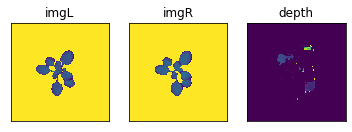

436.03553498078566


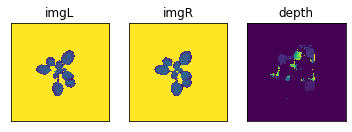

486.68314699065576


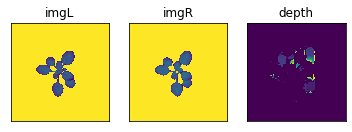

461.966399280922


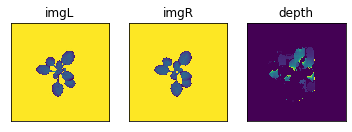

519.4603555221134


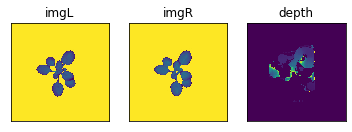

521.8920052904587


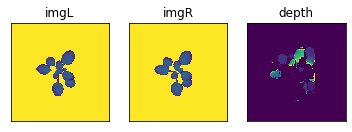

514.9331384829499


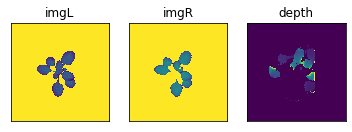

506.8875926820181


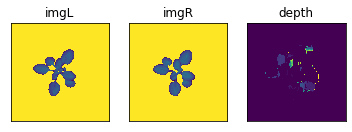

486.66223661223637


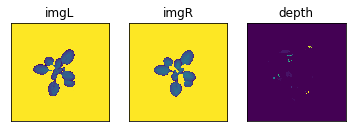

446.01093714402236


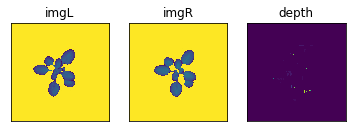

444.93251986873594


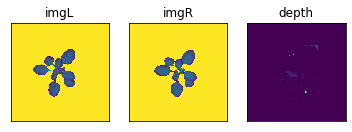

450.1581430978743


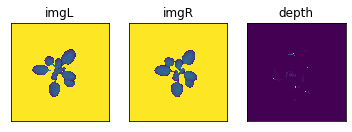

458.4452076212529


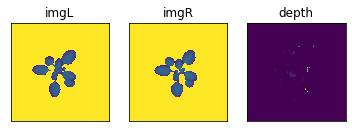

466.240335701216


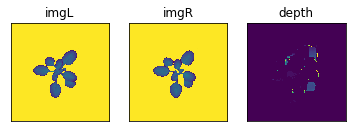

490.66296030744036


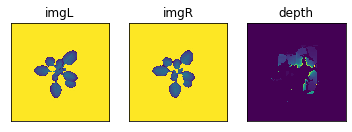

543.4508044887579


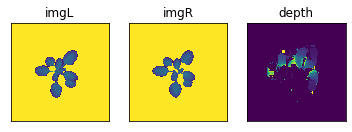

584.5853048158143


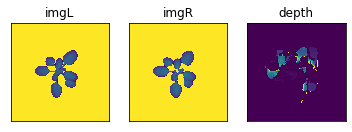

553.5126661156953


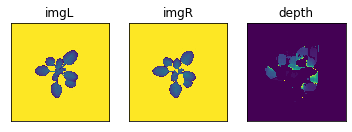

570.2555097850909


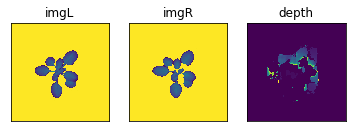

562.9532946990649


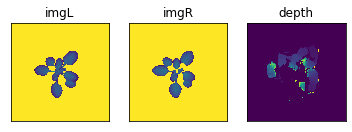

579.8383708689258


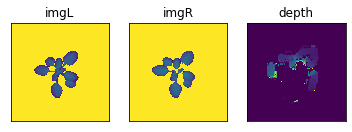

558.7452455856672


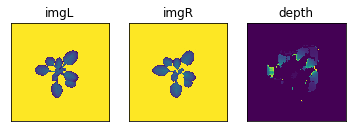

564.1983503429553


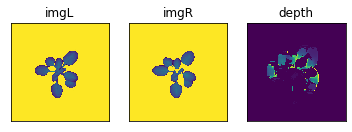

595.3758110197532


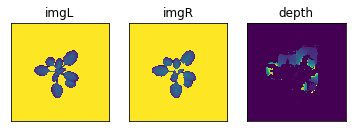

576.4010602321656


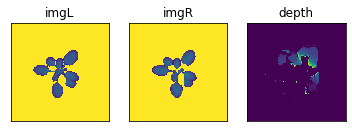

562.6548927388865


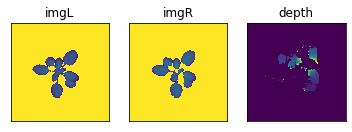

559.0848580534839


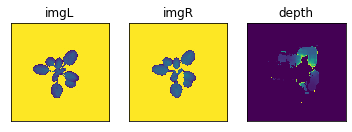

591.110493166244


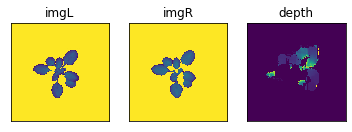

589.3436417056594


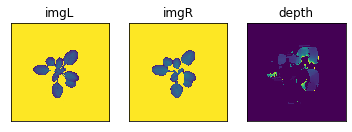

581.0752483987649


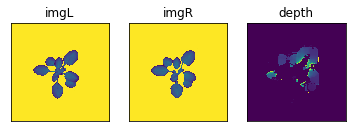

588.2172213497627


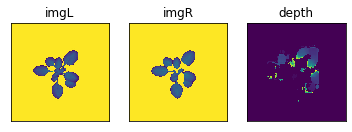

581.1408079386094


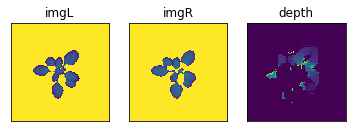

581.9048164817709


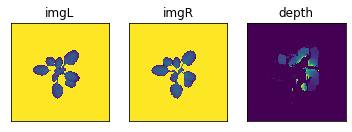

582.0153780384812


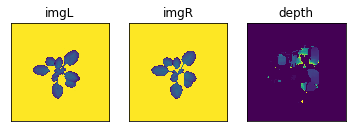

581.5289089026184


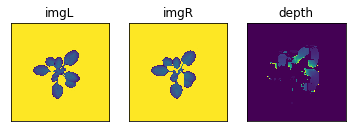

591.677255315397


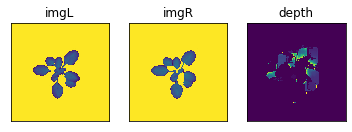

593.2413414910757


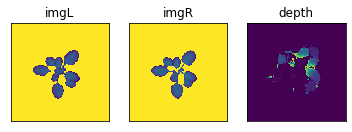

598.1494423442886


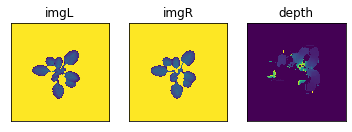

594.388946843234


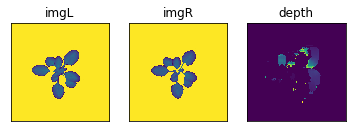

586.8114962987463


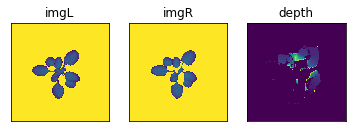

591.8898768244327


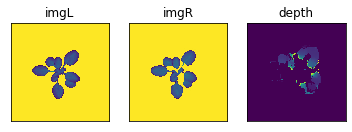

577.6052051089633


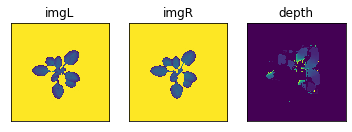

587.4593559095421


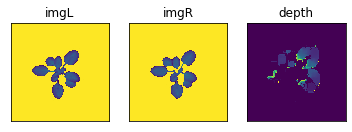

593.2242636191947


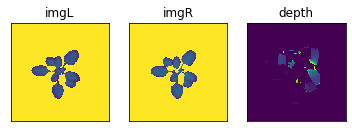

562.8180470041636


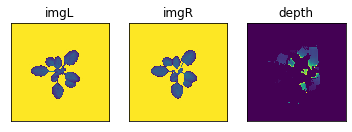

594.5418086485962


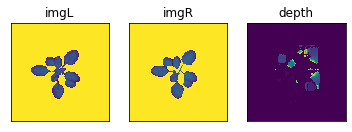

581.10951959601


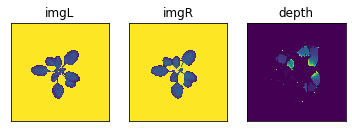

582.6231269901065


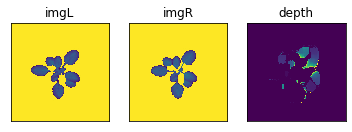

599.5731572281053


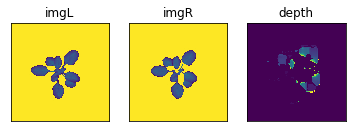

583.8487679314013


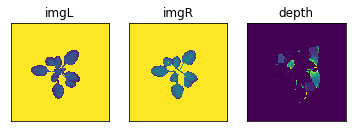

592.9283709230768


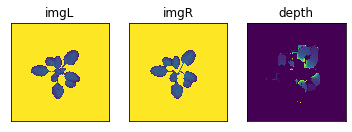

595.2669151312773


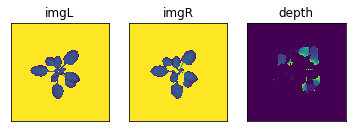

590.3047561130568


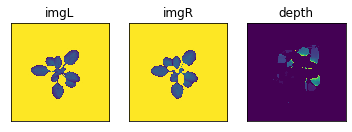

581.9270968954011


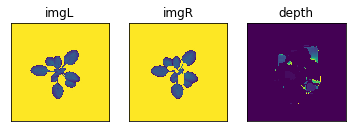

568.9087811458617


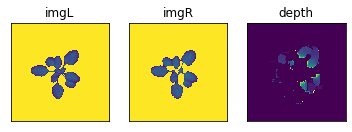

582.3523708834275


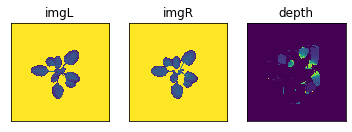

601.0189348813025


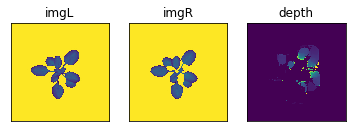

591.4258861301637


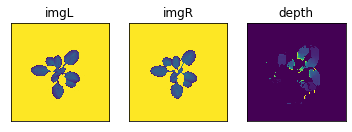

594.4046307440719


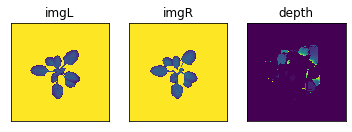

586.4530541264126


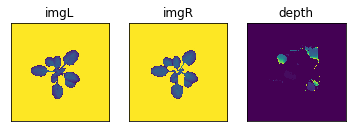

572.765425446288


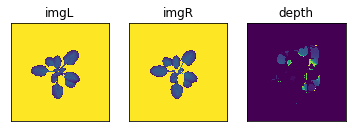

586.1932770110055


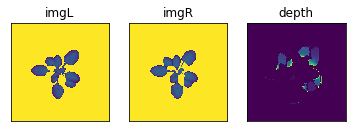

578.0295458951979


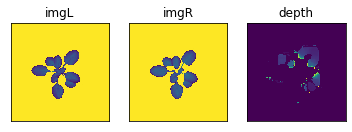

580.8444941397382


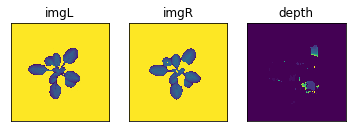

579.065887022176


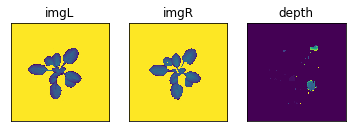

576.1505953339645


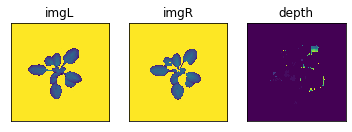

573.457942233333


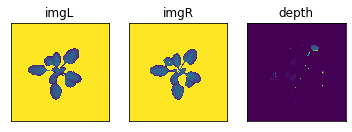

564.3552741696802


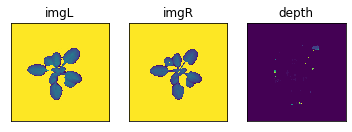

594.835220756775


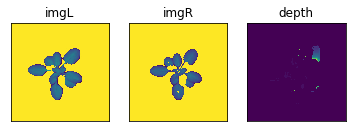

611.3044436894896


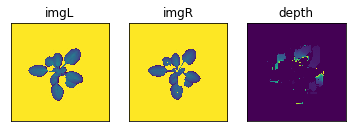

660.1364851735099


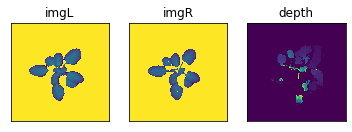

672.0932204864494


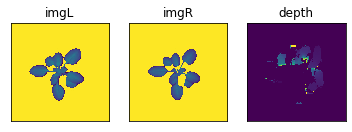

657.1889044112851


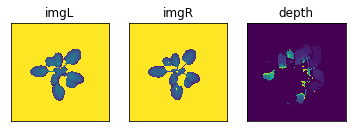

697.3491346801395


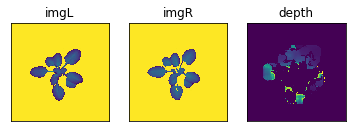

695.427272258361


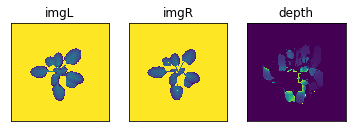

728.9614099371314


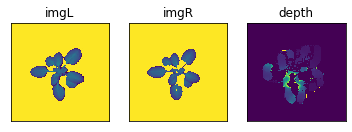

721.3420891841349


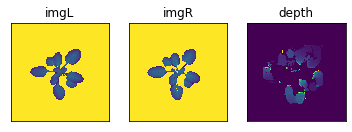

674.403084595852


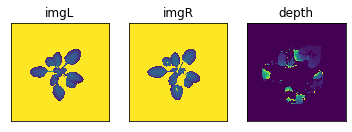

697.6168000632581


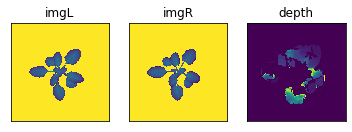

715.9677573891089


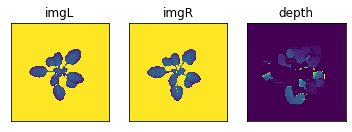

695.0892332692482


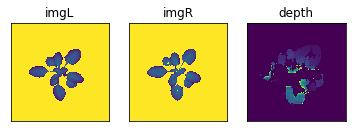

708.210145744702


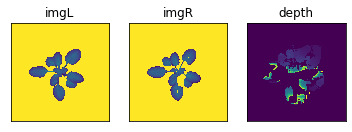

727.4130581949638


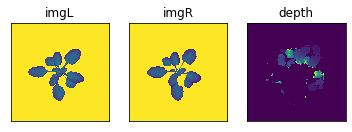

682.7076629650236


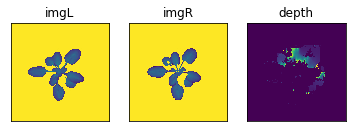

676.9475404105236


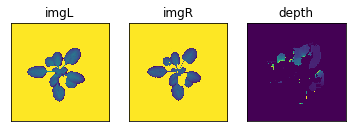

681.9052766453259


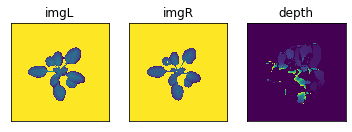

736.5194983179716


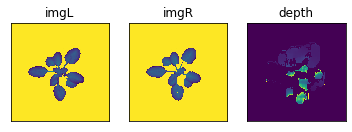

721.6822631967912


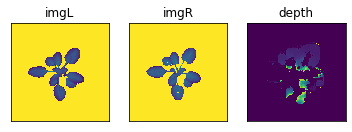

716.0424537765374


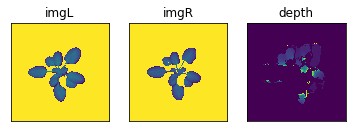

701.5923787679114


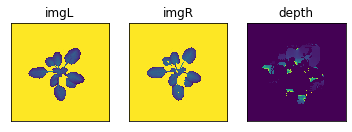

678.5157736091747


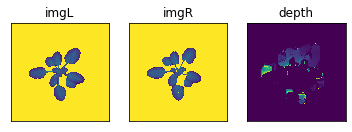

693.2876789867818


In [7]:
for mainCnt in range(0,len(imNames)):
    fname = imNames[mainCnt]
    file1  = os.path.join(folder1,fname)
    file2  = os.path.join(folder2,fname)

    imgL = cv2.cvtColor(cv2.imread(file1),cv2.COLOR_BGR2GRAY)
    imgR =  cv2.cvtColor(cv2.imread(file2),cv2.COLOR_BGR2GRAY)
    
    sbm = cv2.StereoBM_create(numDisparities=disparities,
                          blockSize=block)
 
    disparity = sbm.compute(imgL,imgR)

    # The soil is considered a perfect plane with center at the origin (0, 0, 0)
    # The ideal soil is a reference for the rosette depth
    depth = np.zeros(shape=imgL.shape).astype(float)
    depth[disparity > 0] = (fx * baseline) / (units * disparity[disparity > 0])
    depth = (depth - np.min(depth)) / np.max(depth) - np.min(depth)
    
    
    #Considering that a pixel is the smallest area element in the plane XY 
    #it can be considered as the the smallest area element in the plane XZ and YZ
    # It means that an increment in the plane XZ and YZ is proportional to XY
    # The total surface area can be the sum of the area in the plane XY plus 
    # the area in the plane XZ

    
    BWl = np.copy(imgL)
    BWl[BWl == 255] = 0
    BWl[BWl > 0] = 255
    BWr = np.copy(imgR)
    BWr[BWr == 255] = 0
    BWr[BWr > 0] = 255
    areaL = len(BWl[BWl>10])
    areaR = len(BWr[BWr>10])
    areaXY = np.max([areaL, areaR]) * (pixelSize ** 2)
    areaXZ = np.sum(depth) * (pixelSize ** 2)
    areaTotal = areaXY + areaXZ
    plotting.im3(imgL, imgR, depth, 'imgL', 'imgR', 'depth')
    print(areaTotal)